Dataset link : https://www.kaggle.com/code/aslanahmedov/predict-term-deposit-banking/data?select=Assignment-2_Data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Assignment-2_Data.csv')

In [4]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 18)

In [6]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# check the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [8]:
# Check data shape
df.shape

(45211, 18)

In [9]:
# Describe the numerical features
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Check categorical features and its unique values
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


## Exploratory data analysis

1. Find Unwanted columns
2. Find Missing and duplicate values
3. Find features with one value
4. Explote the categorical features
5. Find cateorical features distribution
6. Realationship between categorical features and lables
7. Explore the numerical features
8. Find discrete numerical features
9. Relation between discrete numerical features and lables 
10. Find continuous numerical features
11. Distributin of continuous numerical features
12. Relation between continuous numerical features and lables
13. Find outliers in numerical data
14. Explore the correlation between numerical features
15. Find pair plot
16. Check the dataset is balanced or not based on target value in classification

### 1. Find unwanted columns

In [11]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

##### Analysis:
- ID is not required in our analysis

### 2. Find missing and duplicate values

In [12]:
df.duplicated().value_counts()

False    45211
dtype: int64

In [13]:
df.isnull().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
features_mv = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for feature in features_mv:
    print(feature,np.round(df[feature].isnull().sum(),4), 'missing values')

age 9 missing values
balance 3 missing values


##### Analysis:
- Column age and balance contains missing values.
- We filled the missing values with mean of that column

### 3. Find features with one value
If feature is with one unique value then its is not required for us

In [15]:
for column in df.columns:
    print(column,df[column].nunique())  # nunique function returns count of unique values from dataframe

Id 45211
age 79
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


##### Analysis:

- No featues found with one unique value

### 4. Explore the categorical features

In [16]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtype=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [17]:
for feature in categorical_features:
    print("Feature Name:",feature)
    print("No of values",len(df[feature].unique()))
    print("Unique values",df[feature].unique())
    print("-" * 100)

Feature Name: job
No of values 12
Unique values ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------------------------------------------------------------
Feature Name: marital
No of values 3
Unique values ['married' 'single' 'divorced']
----------------------------------------------------------------------------------------------------
Feature Name: education
No of values 4
Unique values ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------------------------------------------------------------------
Feature Name: default
No of values 2
Unique values ['no' 'yes']
----------------------------------------------------------------------------------------------------
Feature Name: housing
No of values 2
Unique values ['yes' 'no']
-----------------------------------------------------------------------------------------

##### Analysis:
- There are total 9 categorical features
- Featue job and month has highest number of categorical values

### 5. Find categorical feature distribution

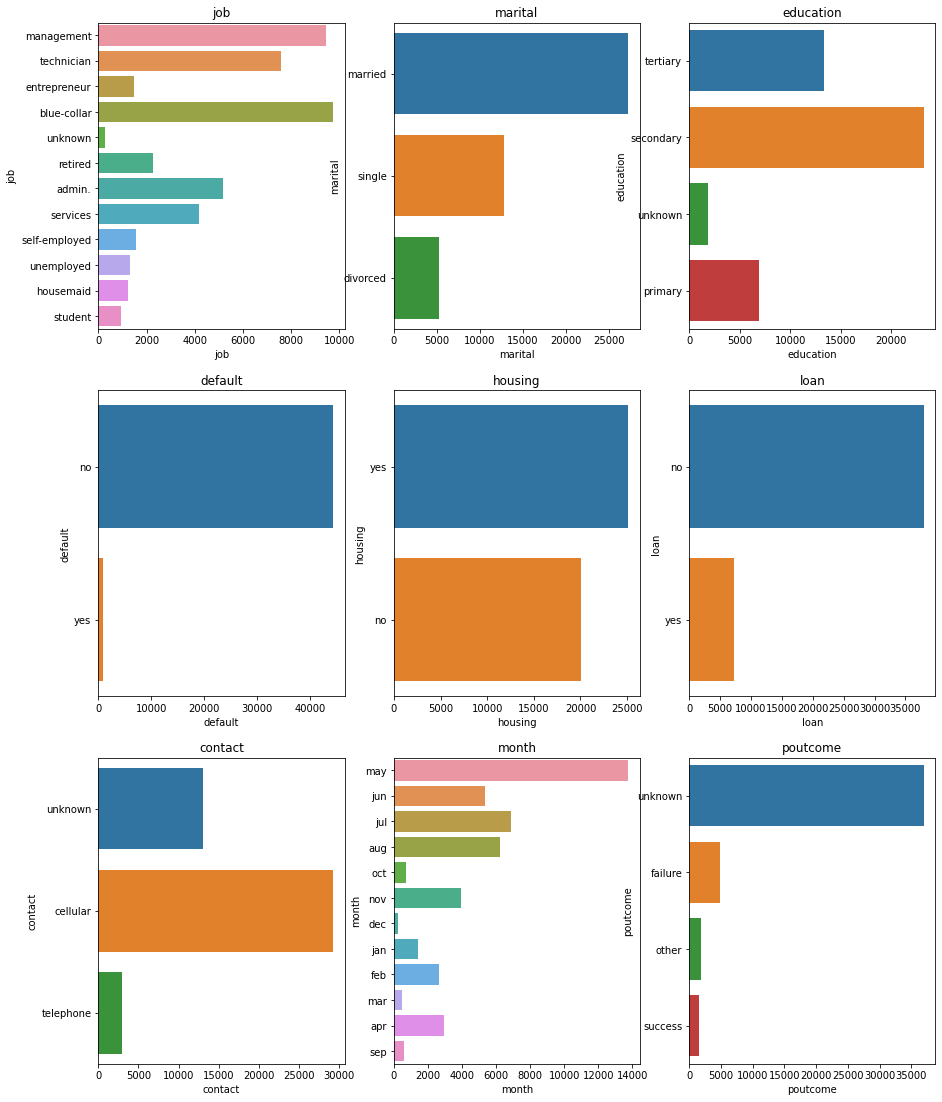

In [18]:
# Check count based on categorical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1 
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

##### Analysis:
- Clients with job type management and blue collar are high.
- Clients who are maried are high in records in the dataset and divorsed are less.
- Clients with education background as secondary are high.
- Data of may month is high and dec is less.
- Default column does not play any important role as the data of that column is highly imbalanced. We can drop it.

### 6. Relationship between Categorical Features and label

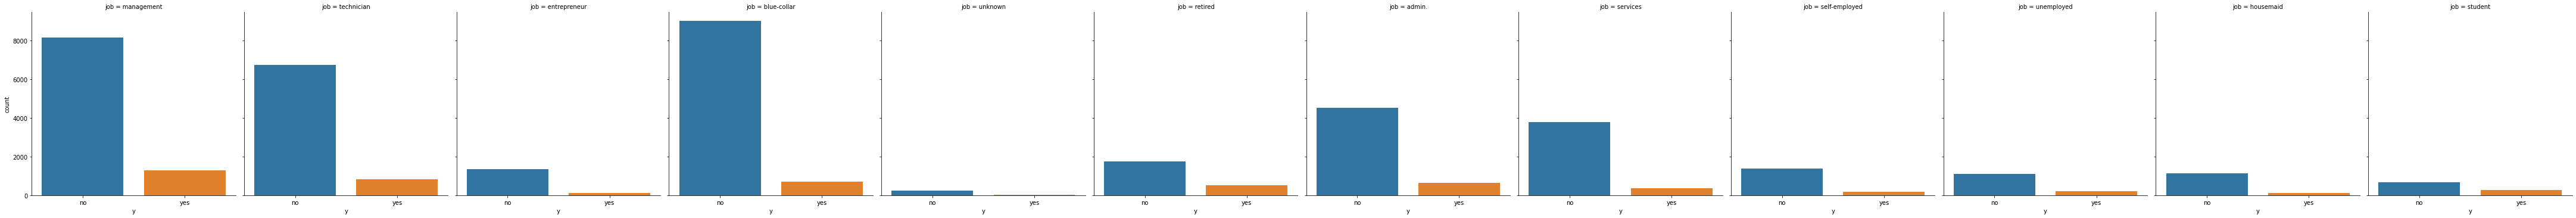

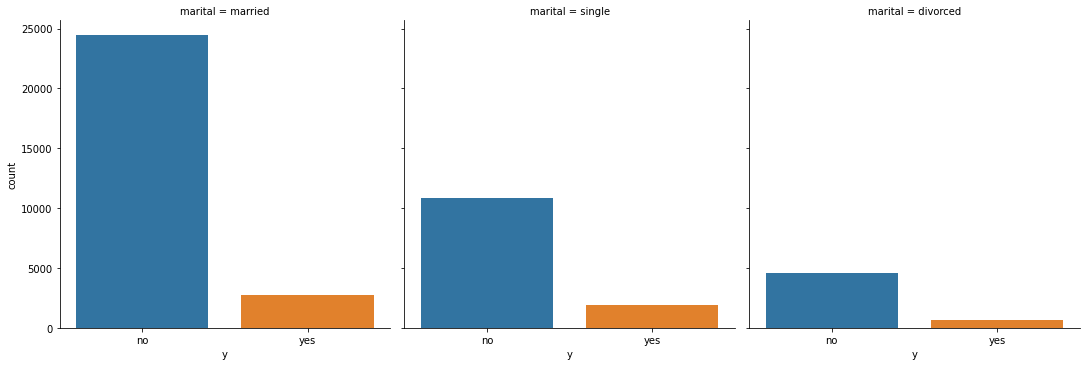

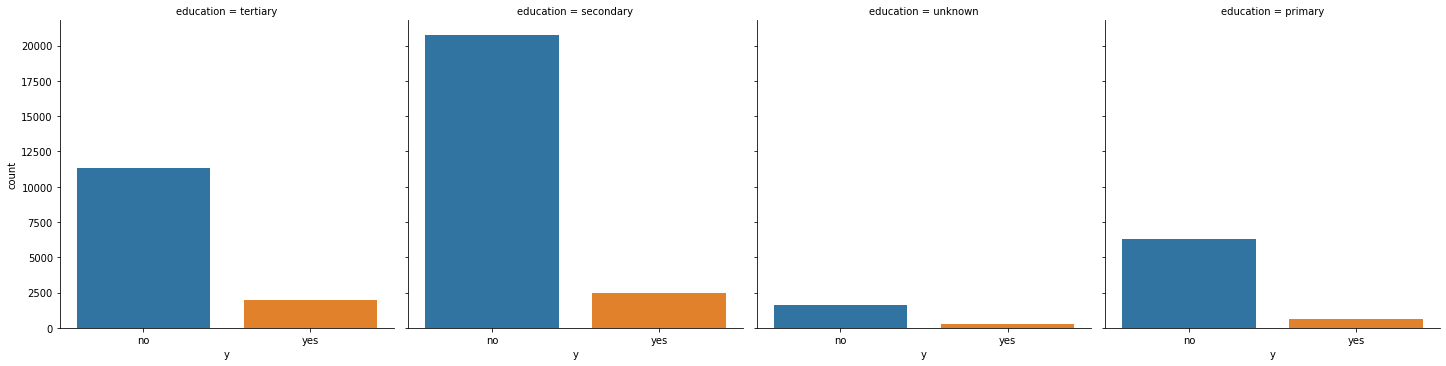

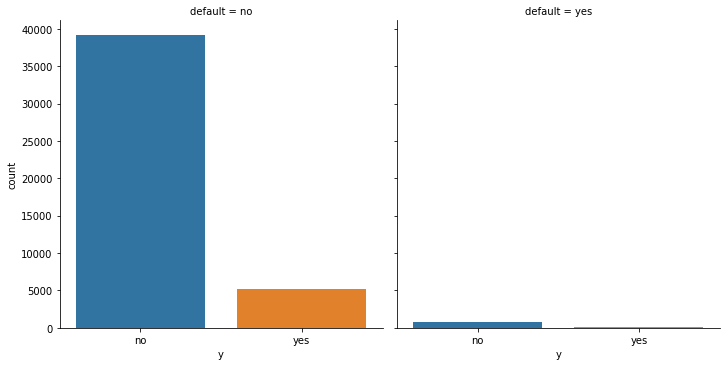

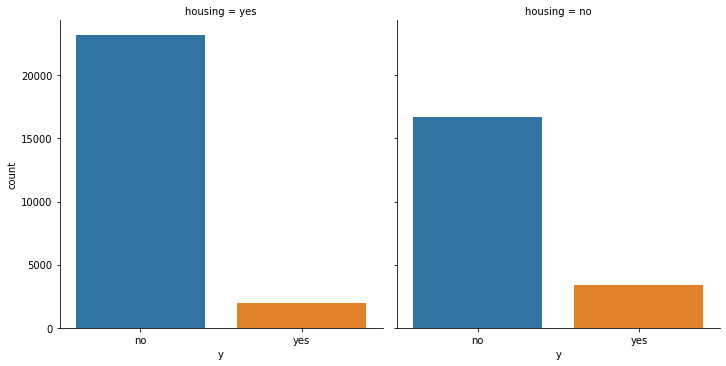

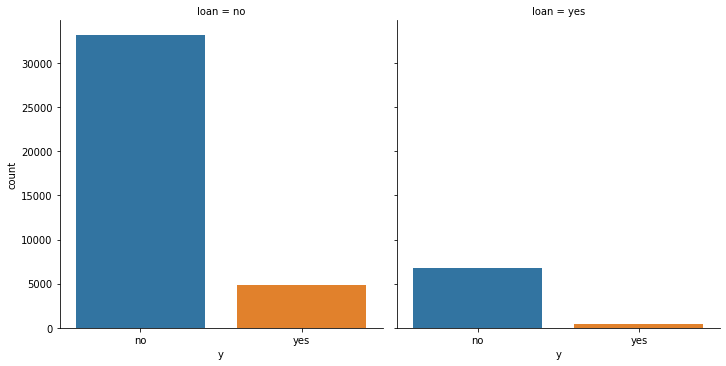

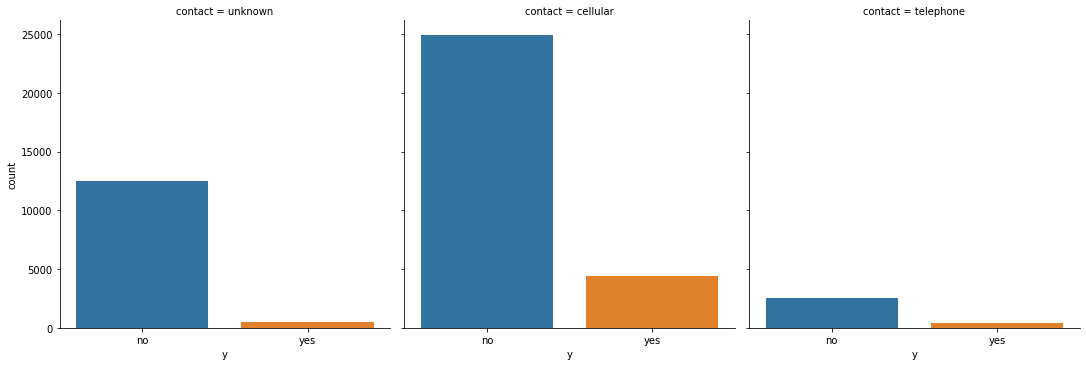

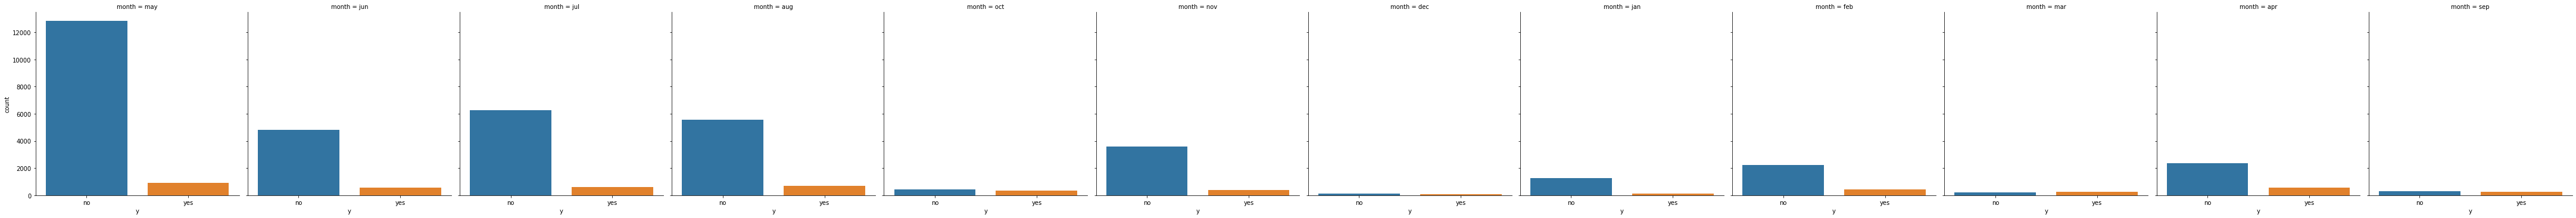

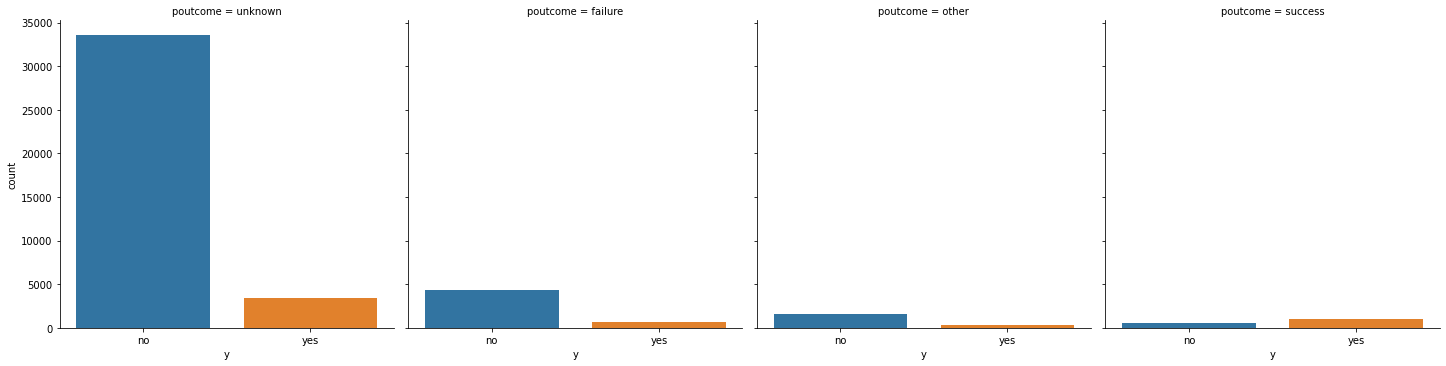

In [19]:
# check target label split over categorical features
# Find out the relationship between ccategorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y',col=categorical_feature,kind='count',data=df)
plt.show()

In [20]:
# checck target label split over categoriccal features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

##### Analysis
- Retired clients have high interest in deposits.
- Client who has housing loan are not interested in term deposit.
- In month of Aug, Apr, july, dec people show high interest in opening term deposit.
- Although more people were contacted in months of may, june and july less people have shown interest in term deposit. The possible reason may be that since people paid taxes in the ending of financial year, they do not have excess funds to open TD.

### 7. Explore the numerical features

In [21]:
# List of numerical features
numerical_features = [numerical_feature for numerical_feature in df.columns if df[numerical_feature].dtype!='O' and (numerical_feature not in ['y'])]
numerical_features

['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [22]:
print("Number of numerical features:", len(numerical_features))

Number of numerical features: 8


In [23]:
df[numerical_features]

,Id,age,balance,day,duration,campaign,pdays,previous
0,1001,999.0,2143.0,5,261,1,-1,0
1,1002,44.0,29.0,5,151,1,-1,0
2,1003,33.0,2.0,5,76,1,-1,0
3,1004,47.0,1506.0,5,92,1,-1,0
4,1005,33.0,1.0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,17,977,3,-1,0
45207,46208,71.0,1729.0,17,456,2,-1,0
45208,46209,72.0,5715.0,17,1127,5,184,3
45209,46210,57.0,668.0,17,508,4,-1,0


##### Analysis
- There are total 7 numerical features.

### 8. Find Discrete Numerical Features

In [24]:
discerete_numerical_features = [feature for feature in numerical_features if len(df[feature].unique()) < 20]
print("Discrete variable count: {}".format(len(discerete_numerical_features)))

Discrete variable count: 0


##### Analysis:
 There no discrete variable in given dataset

### 9. Relation between discrete numerical features and label

##### Analysis:
- Not applicable

### 10. Find continuous numerical features

In [25]:
continuous_features =  [feature for feature in numerical_features if feature not in discerete_numerical_features + ['y']]
print("Count of continuous features is {}".format(len(continuous_features)))

Count of continuous features is 8


##### Analysis:
- There are 7 continuous features

### 11. Distribution of continuous numerical features

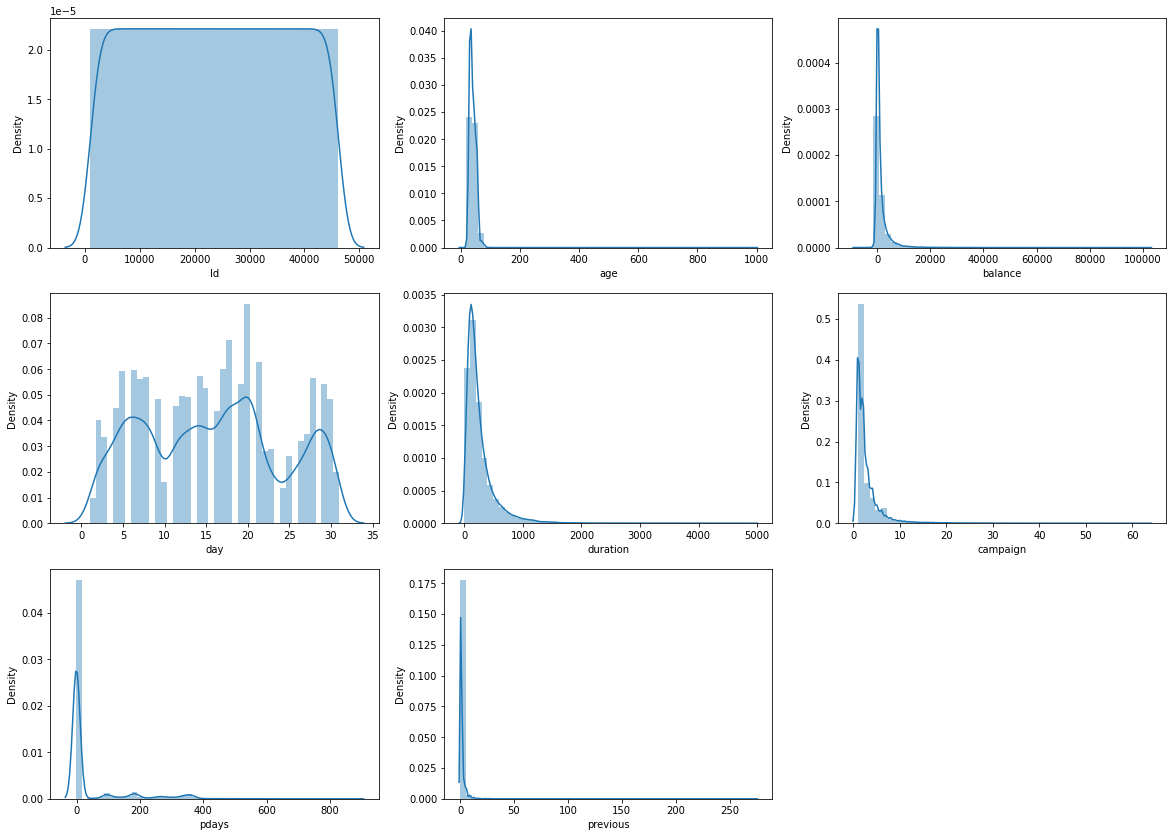

In [26]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1

for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber +=1
plt.show()

##### Analysis:
- age,balance, duration, campaign, pdays,previous columns are skewed towards right and has some outliers
- day column is normally distributed

### 12. Relation between continuous numerical features and labels

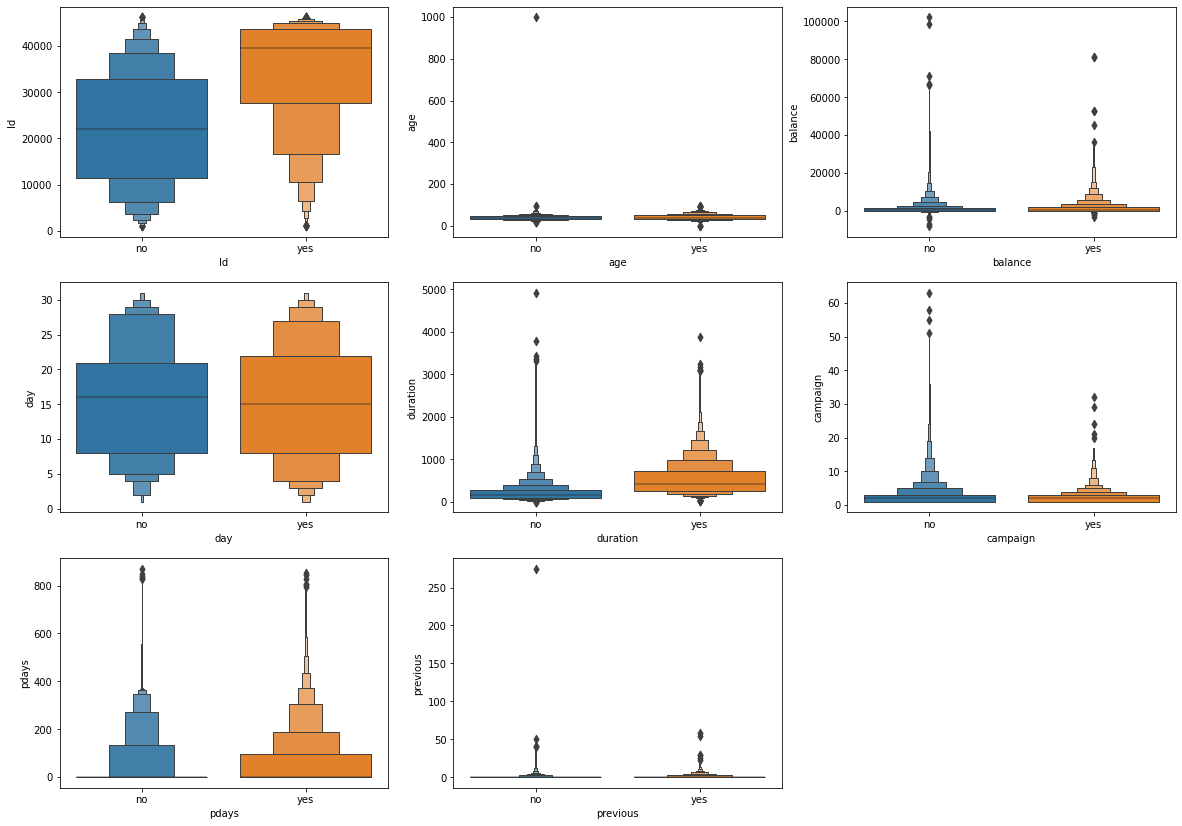

In [27]:
# Boxplot to show target distribution with respect to numerical features
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxenplot(x='y',y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber +=1
plt.show()

##### Analysis:
- client shows interest on deposit who had discussion for longer duration
- Since lot of data contains outliers, it is bit difficult to analyze. We can check this again after removing outliers.

### 13. Find outliers in numerical data

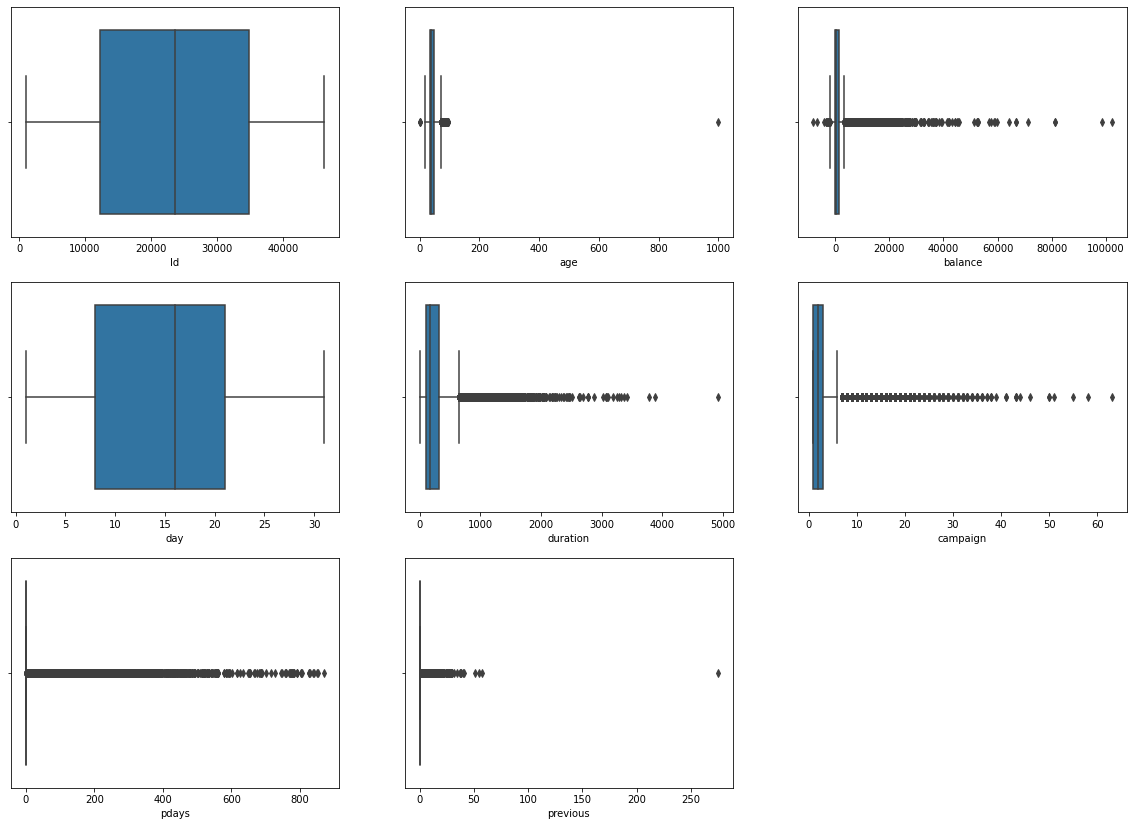

In [28]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnumber +=1
plt.show()

##### Analysis:
- Columns age, balance, duration, compaign, pdays and previous have some outliers

### 14. Explore the correlation between numerical features

<AxesSubplot:>

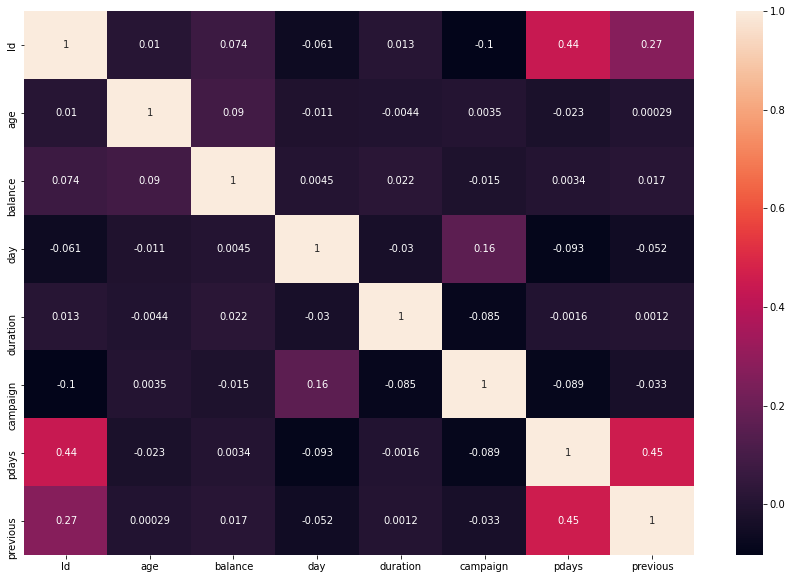

In [29]:
corr = df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

##### Analysis:
 It seems that no feature is heavliy correlated with other features

### 15. Check the dataset is balanced or not based on target value in classification

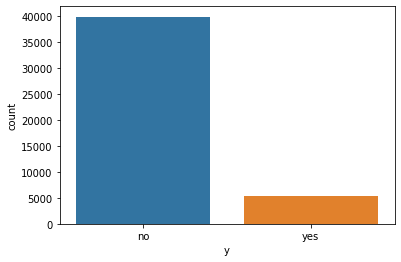

In [30]:
sns.countplot(x='y',data=df)
plt.show()

In [31]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

##### Analysis:
- Data is highly imbalanced

## Feature Engineering

1. drop unwanted features
2. handle missing values
3. remove outliers
4. handle categorical features
5. handle feature scaling

In [32]:
df2 = df.copy()

In [33]:
df2.shape

(45211, 18)

In [34]:
# default feature does not play important role
df2.groupby('default').size()

default
no     44396
yes      815
dtype: int64

In [35]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

### 1. Drop unwanted features

In [36]:
# Drop default column
df2.drop(['default'],axis=1,inplace=True)

In [37]:
# Drop id column as it is not playing any important role
df2.drop(columns=['Id'],inplace=True)

In [38]:
df2.groupby(['y','pdays']).size().sort_values(ascending=False)

y    pdays
no   -1       33570
yes  -1        3384
      92         96
no    370        90
      182        87
              ...  
      808         1
      826         1
      831         1
      838         1
      578         1
Length: 914, dtype: int64

In [39]:
df2.shape

(45211, 16)

In [40]:
(33570 + 3384)/45211 * 100

81.73674548229414

In [41]:
# Around 82 % of data in pdays column contains value -1. Hence this column can be dropped
df.drop(columns=['pdays'],axis=1,inplace=True)

### 2. Handle missing values

In [42]:
# Since there are missing values in our dataset, we will replace them with mean.
for feature in features_mv:
    df2[feature].fillna(df2[feature].mean(),inplace=True)
else:
    print("No missing values now")

No missing values now


### 3. Remove outliers

In [43]:
# Remove outliers from age column
df2.groupby('age',sort=True)['age'].count()

age
-1.0       3
 18.0     12
 19.0     35
 20.0     50
 21.0     79
          ..
 92.0      2
 93.0      2
 94.0      1
 95.0      2
 999.0     1
Name: age, Length: 80, dtype: int64

We can see that age column contains -1 and 999 value which is not feasible. We can consider age till 95. So we can remove values less than 18 and greater than 95

In [44]:
df2 = df2[(df2['age'] >= 18) & (df2['age'] <= 95)]

<AxesSubplot:xlabel='age'>

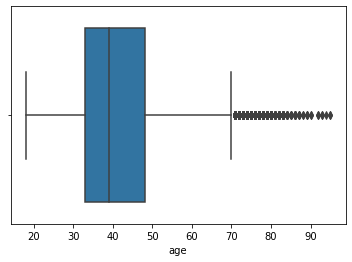

In [45]:
sns.boxplot(x='age',data=df2)

Balance of user can be negative. Since users with negative balance are not taking TD. Hence this is valuable data and we will not remove outliers

In [46]:
# Remove outliers in feature duration
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

As duration of call increases, user is likely to enroll for Term Deposit. Hence we will not remove outliers from this column

In [47]:
# Remove outliers in feature campaign
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14982
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [48]:
pd.set_option('display.max_rows', 70)

In [49]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14982
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
     36              4
     37              2
     38              3
     39              1
     41              2
     43              3
     44              1
     46             

when campaign value is more than 35, there is a small difference between campaign values and count of those values is less that 3 each. Also these values, user is not taking term deposit. So we can consider this as outlier and drop these values.

In [50]:
df2 = df2[(df2['campaign'] <= 35)]

In [51]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14982
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
yes  1            2559
     2            1400
     3             618
     4             317
     5             139
     6              92
     7              47
     8              

In [52]:
# Remove outliers from feature previous
df2.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           33546
     1            2189
     2            1650
     3             848
     4             543
     5             338
     6             194
     7             151
     8              90
     9              68
     10             41
     11             50
     12             34
     13             29
     14             14
     15             19
     16             13
     17             12
     18              6
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
     275             1
yes  0            3382
     1             583
     2             456
     3             2

Values above 30 can be considered as outliers

In [53]:
df2 = df2[df2.previous < 31]

### 4. handle categorical features

#### Handle binary categorical features

In [54]:
yes_no_columns = ['housing','loan']
for col in yes_no_columns:
    df2[col+'_new'] = df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df2.drop(col,axis=1,inplace=True)

In [55]:
df2.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y,housing_new,loan_new
1,44.0,technician,single,secondary,29.0,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33.0,entrepreneur,married,secondary,2.0,unknown,5,may,76,1,-1,0,unknown,no,1,1
3,47.0,blue-collar,married,unknown,1506.0,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33.0,unknown,single,unknown,1.0,unknown,5,may,198,1,-1,0,unknown,no,0,0
5,35.0,management,married,tertiary,231.0,unknown,5,may,139,1,-1,0,unknown,no,1,0


In [56]:
## Same encoding can be done using labelencoder. We are applying this on target column.
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()
label_encoder_for_target = label_encoder.fit_transform(df2.y)
df2['Target'] = label_encoder_for_target
df2.drop(columns=['y'],axis=1,inplace=True)
df2.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,housing_new,loan_new,Target
1,44.0,technician,single,secondary,29.0,unknown,5,may,151,1,-1,0,unknown,1,0,0
2,33.0,entrepreneur,married,secondary,2.0,unknown,5,may,76,1,-1,0,unknown,1,1,0
3,47.0,blue-collar,married,unknown,1506.0,unknown,5,may,92,1,-1,0,unknown,1,0,0
4,33.0,unknown,single,unknown,1.0,unknown,5,may,198,1,-1,0,unknown,0,0,0
5,35.0,management,married,tertiary,231.0,unknown,5,may,139,1,-1,0,unknown,1,0,0


In [58]:
pd.set_option('display.max_rows', 70)

In [59]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

#### Handle non binary categorical features using get dummies method. This can be acheived using OneHotEncoder from sklearn library

In [60]:
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in categorical_features:
    df2 = pd.concat([df2.drop(col,axis=1),pd.get_dummies(df2[col],prefix=col,prefix_sep = '_',drop_first=True,dummy_na=False)],axis=1)   

In [61]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,housing_new,loan_new,Target,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,44.0,29.0,5,151,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33.0,2.0,5,76,1,-1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47.0,1506.0,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33.0,1.0,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,35.0,231.0,5,139,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### 5. handle feature scaling

In [62]:
numerical_features  = numerical_features[1:]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

In [64]:
scaler = StandardScaler()
scaler.fit(df2[numerical_features])
data_scaled = scaler.transform(df2[numerical_features])


In [65]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,housing_new,loan_new,Target,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,0.288316,-0.437894,-1.298237,-0.416469,-0.589898,-0.411492,-0.31511,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747708,-0.446760,-1.298237,-0.707685,-0.589898,-0.411492,-0.31511,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.570868,0.047085,-1.298237,-0.645559,-0.589898,-0.411492,-0.31511,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.747708,-0.447088,-1.298237,-0.233974,-0.589898,-0.411492,-0.31511,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,-0.559340,-0.371567,-1.298237,-0.463064,-0.589898,-0.411492,-0.31511,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
data_scaled

array([[ 0.28831575, -0.43789437, -1.29823741, ..., -0.58989783,
        -0.41149199, -0.31510983],
       [-0.74770802, -0.44675993, -1.29823741, ..., -0.58989783,
        -0.41149199, -0.31510983],
       [ 0.57086769,  0.04708466, -1.29823741, ..., -0.58989783,
        -0.41149199, -0.31510983],
       ...,
       [ 2.92546717,  1.42912713,  0.14385427, ...,  0.76393755,
         1.43856337,  1.36002057],
       [ 1.51270748, -0.22807609,  0.14385427, ...,  0.4254787 ,
        -0.41149199, -0.31510983],
       [-0.37097211,  0.52812344,  0.14385427, ..., -0.25143899,
         1.47856457,  5.82703498]])

In [67]:
scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

In [68]:
df2

,age,balance,day,duration,campaign,pdays,previous,housing_new,loan_new,Target,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,0.288316,-0.437894,-1.298237,-0.416469,-0.589898,-0.411492,-0.315110,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747708,-0.446760,-1.298237,-0.707685,-0.589898,-0.411492,-0.315110,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.570868,0.047085,-1.298237,-0.645559,-0.589898,-0.411492,-0.315110,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.747708,-0.447088,-1.298237,-0.233974,-0.589898,-0.411492,-0.315110,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,-0.559340,-0.371567,-1.298237,-0.463064,-0.589898,-0.411492,-0.315110,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947604,-0.176524,0.143854,2.790791,0.087020,-0.411492,-0.315110,0,0,1,...,0,0,0,0,1,0,0,0,0,1
45207,2.831283,0.120308,0.143854,0.767810,-0.251439,-0.411492,-0.315110,0,0,1,...,0,0,0,0,1,0,0,0,0,1
45208,2.925467,1.429127,0.143854,3.373223,0.763938,1.438563,1.360021,0,0,1,...,0,0,0,0,1,0,0,0,1,0
45209,1.512707,-0.228076,0.143854,0.969720,0.425479,-0.411492,-0.315110,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Separate data and target column

In [69]:
X = df2.drop(columns=['Target'])
y = df2.filter(['Target'],axis=1)
# y = df2['Target']

In [70]:
X

,age,balance,day,duration,campaign,pdays,previous,housing_new,loan_new,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,0.288316,-0.437894,-1.298237,-0.416469,-0.589898,-0.411492,-0.315110,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747708,-0.446760,-1.298237,-0.707685,-0.589898,-0.411492,-0.315110,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.570868,0.047085,-1.298237,-0.645559,-0.589898,-0.411492,-0.315110,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.747708,-0.447088,-1.298237,-0.233974,-0.589898,-0.411492,-0.315110,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,-0.559340,-0.371567,-1.298237,-0.463064,-0.589898,-0.411492,-0.315110,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947604,-0.176524,0.143854,2.790791,0.087020,-0.411492,-0.315110,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,2.831283,0.120308,0.143854,0.767810,-0.251439,-0.411492,-0.315110,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,2.925467,1.429127,0.143854,3.373223,0.763938,1.438563,1.360021,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.512707,-0.228076,0.143854,0.969720,0.425479,-0.411492,-0.315110,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## Split the dataset 

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

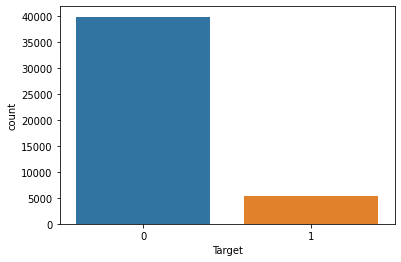

In [72]:
# Check the balance of dataset
sns.countplot(x='Target',data=df2)
plt.show()

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
# Create finction instance
sm = SMOTE(random_state = 15)

# Apply it to training dataset
X_train_sampled, y_train__sampled = sm.fit_resample(X_train,y_train)

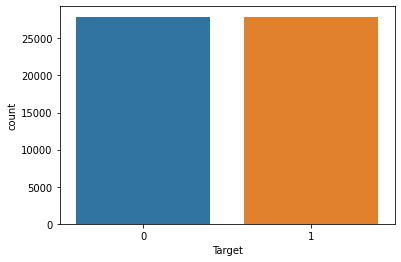

In [75]:
# Check the balance of dataset
sns.countplot(x='Target',data=y_train__sampled)
plt.show()

## Import machine learning libraries

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix,classification_report, plot_roc_curve

### 1. Logistic Regression

In [77]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train_sampled,y_train__sampled)
logisticModelPrediction = logisticModel.predict(X_test)

In [78]:
print(classification_report(y_test,logisticModelPrediction))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92     11962
           1       0.43      0.66      0.52      1590

    accuracy                           0.86     13552
   macro avg       0.69      0.77      0.72     13552
weighted avg       0.89      0.86      0.87     13552



### Plot confusion matrix

In [79]:
confusion_matrix(y_test,logisticModelPrediction)

array([[10545,  1417],
       [  537,  1053]], dtype=int64)

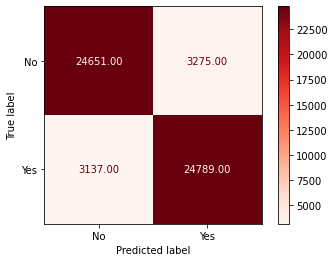

In [80]:
plot1 = plot_confusion_matrix(logisticModel,X_train_sampled,y_train__sampled,display_labels=['No','Yes'],cmap = plt.cm.Reds,values_format = '.2f')
#plot1.figure.title('Confusion Matrix')
plt.show()

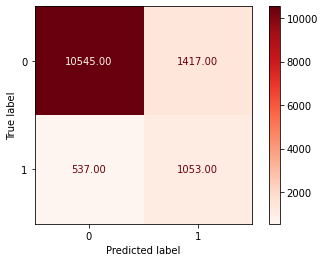

In [81]:
plot2 = plot_confusion_matrix(logisticModel,X_test,y_test,cmap = plt.cm.Reds,values_format = '.2f')
#plot1.figure.title('Confusion Matrix')
plt.show()

### 2.Decision Tree

In [82]:
decisionClass = DecisionTreeClassifier(max_depth = 10, random_state = 40)
decisionClass.fit(X_train_sampled,y_train__sampled)
decisionClassprediction = decisionClass.predict(X_test)

In [83]:
print(classification_report(y_test,decisionClassprediction))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11962
           1       0.42      0.77      0.55      1590

    accuracy                           0.85     13552
   macro avg       0.69      0.81      0.73     13552
weighted avg       0.90      0.85      0.87     13552



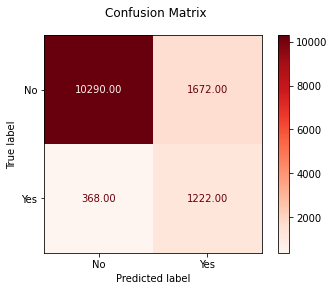

In [84]:
plot3 = plot_confusion_matrix(decisionClass,X_test,y_test,display_labels=['No','Yes'],cmap = plt.cm.Reds,values_format = '.2f')
plot3.figure_.suptitle("Confusion Matrix")
plt.show()

### 3. KNN algorithm

In [85]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_sampled,y_train__sampled)
knn_prediction = knn.predict(X_test)

In [86]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     11962
           1       0.36      0.88      0.51      1590

    accuracy                           0.80     13552
   macro avg       0.67      0.84      0.69     13552
weighted avg       0.91      0.80      0.83     13552



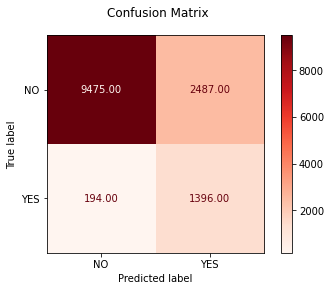

In [87]:
plot_3 = plot_confusion_matrix(knn, X_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

### ROC plot

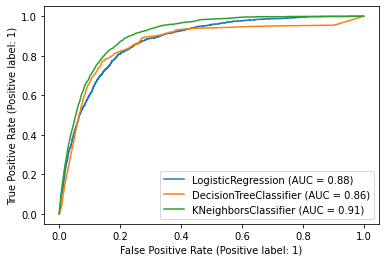

In [88]:
models = [logisticModel,decisionClass,knn]
ax = plt.gca()
for i in models:
    plot_roc_curve(i,X_test,y_test,ax=ax)